# Small models from july 2024

## 1. Install dependencies

**Important :** this will only work if **cuda 12.4.0** and Pytorch 2.4.0 are installed in the underlying conda environment.

```bash
conda install -y cuda -c nvidia/label/cuda-12.4.0

conda install -y pytorch=2.4.0 torchvision=0.19.0 torchaudio=2.4.0 pytorch-cuda=12.4 -c pytorch -c nvidia/label/cuda-12.4.0
```

The FP8 kernels are not supported in cuda 12.1.0 required by pytorch 2.3.1.

Starting with version 0.5.4, VLLM requires pytorch 2.4.0.

In [ ]:
pip install --upgrade transformers

In [ ]:
pip install --upgrade vllm

In [10]:
from importlib.metadata import version

In [11]:
version('torch')

'2.4.0'

In [12]:
version('transformers')

'4.44.0'

In [13]:
version('vllm')

'0.5.4'

In [14]:
version('vllm-flash-attn')

'2.6.1'

## Mistral 7b v0.3

RTX 4090 speed (FP8): **90 tokens/sec**

RTX 4090 speed (BF16): **57 tokens/sec**

https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3

https://huggingface.co/neuralmagic/Mistral-7B-Instruct-v0.3-FP8

**LICENSE :** Apache 2.0

In [2]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

model_id = "neuralmagic/Mistral-7B-Instruct-v0.3-FP8"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

tokenizer_config.json:   0%|          | 0.00/137k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/793 [00:00<?, ?B/s]

INFO 08-11 22:15:05 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='neuralmagic/Mistral-7B-Instruct-v0.3-FP8', speculative_config=None, tokenizer='neuralmagic/Mistral-7B-Instruct-v0.3-FP8', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=fp8, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=neuralmagic/Mistral-7B-Instruct-v0.3-FP8, use_v2_block_manager=False, enable_prefix_caching=False)


generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

WARNING 08-11 22:15:06 utils.py:578] Using 'pin_memory=False' as WSL is detected. This may slow down the performance.
INFO 08-11 22:15:06 model_runner.py:720] Starting to load model neuralmagic/Mistral-7B-Instruct-v0.3-FP8...
WARNING 08-11 22:15:06 fp8.py:43] Detected fp8 checkpoint. Please note that the format is experimental and subject to change.
INFO 08-11 22:15:06 weight_utils.py:225] Using model weights format ['*.safetensors']


model-00002-of-00002.safetensors:   0%|          | 0.00/2.57G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 08-11 22:29:20 model_runner.py:732] Loading model weights took 7.0084 GB
INFO 08-11 22:29:21 gpu_executor.py:102] # GPU blocks: 7125, # CPU blocks: 2048
INFO 08-11 22:29:21 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-11 22:29:21 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-11 22:29:30 model_runner.py:1225] Graph capturing finished in 9 secs.


In [6]:
sampling_params = SamplingParams(temperature=0.3, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "user", "content": "Vous êtes un grand philosophe français du siècle des lumières. Quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|█████████████| 1/1 [00:06<00:00,  6.83s/it, est. speed input: 6.30 toks/s, output: 91.22 toks/s]

 Mon cher ami, je suis un simple assistant de conversation et ne suis pas un philosophe vivant. Cependant, je peux vous présenter une interprétation résumée de la philosophie de Voltaire, un des grands philosophes français du siècle des Lumières, sur le sens de la vie.

1. La vie est une aventure et une quête permanente de connaissances. Voltaire a écrit : "La connaissance est la seule chose qui donne de la valeur à la vie." Il croit que la vie est une aventure de découverte, de connaissances et de progrès intellectuel. Il encourage les gens à chercher la vérité, à s'éloigner de l'ignorance et à se consacrer à l'étude et à la raison.

2. La raison est le guide de la vie. Voltaire croit que la raison est le seul moyen de discerner la vérité et de vivre une vie heureuse. Il est convaincu que la raison permet de faire la différence entre le bien et le mal, et de vivre une vie morale et éthique. Il encourage les gens à utiliser leur raison pour faire le bien et à s'éloigner de la superstit

In [3]:
# Authenticate VLLM with Huggingface Hub
import os

with open("/workspace/hftoken", 'r') as file:
    myhftoken = file.read().strip()

os.environ["HF_TOKEN"]=myhftoken

In [4]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

model_id = "mistralai/Mistral-7B-Instruct-v0.3"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

INFO 08-11 22:52:44 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='mistralai/Mistral-7B-Instruct-v0.3', speculative_config=None, tokenizer='mistralai/Mistral-7B-Instruct-v0.3', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=mistralai/Mistral-7B-Instruct-v0.3, use_v2_block_manager=False, enable_prefix_caching=False)


generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

WARNING 08-11 22:52:44 utils.py:578] Using 'pin_memory=False' as WSL is detected. This may slow down the performance.
INFO 08-11 22:52:44 model_runner.py:720] Starting to load model mistralai/Mistral-7B-Instruct-v0.3...
INFO 08-11 22:52:45 weight_utils.py:225] Using model weights format ['*.safetensors']


model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

consolidated.safetensors:   0%|          | 0.00/14.5G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/3 [00:00<?, ?it/s]


INFO 08-11 23:37:35 model_runner.py:732] Loading model weights took 13.5083 GB
INFO 08-11 23:37:36 gpu_executor.py:102] # GPU blocks: 3835, # CPU blocks: 2048
INFO 08-11 23:37:42 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-11 23:37:42 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-11 23:37:53 model_runner.py:1225] Graph capturing finished in 11 secs.


In [7]:
sampling_params = SamplingParams(temperature=0.3, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "user", "content": "Vous êtes un grand philosophe français du siècle des lumières. Quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|█████████████| 1/1 [00:11<00:00, 11.07s/it, est. speed input: 3.89 toks/s, output: 57.20 toks/s]

 Bienvenue ! Je suis un assistant de conversation basé sur l'IA et je ne suis pas un philosophe vivant, mais je peux tenter de répondre à votre question en vous offrant une synthèse de la pensée de Voltaire, un philosophe français du siècle des Lumières, sur le sens de la vie.

1. La vie est un don précieux et fragile : Voltaire considérait la vie comme un don précieux et fragile, qui ne devrait pas être perdu sans raison. Il pensait que la vie devrait être vécue avec respect et gratitude, car elle est rare et précieuse.
2. La raison est le guide de la vie : Voltaire pensait que la raison était le guide de la vie. Il pensait que la raison devait être utilisée pour comprendre le monde et pour guider les actions humaines. Il pensait que la raison devait être utilisée pour éliminer les superstitions et les préjugés, et pour promouvoir la tolérance et la compréhension.
3. La liberté est la base de la vie : Voltaire pensait que la liberté était la base de la vie. Il pensait que la liberté é

## Mistral Nemo 12b

RTX 4090 speed (FP8): **58 tokens/sec**

https://mistral.ai/fr/news/mistral-nemo/

https://huggingface.co/mistralai/Mistral-Nemo-Instruct-2407

https://huggingface.co/neuralmagic/Mistral-Nemo-Instruct-2407-FP8

**LICENSE :** Apache 2.0

In [1]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

model_id = "neuralmagic/Mistral-Nemo-Instruct-2407-FP8"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

INFO 08-11 15:52:31 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='neuralmagic/Mistral-Nemo-Instruct-2407-FP8', speculative_config=None, tokenizer='neuralmagic/Mistral-Nemo-Instruct-2407-FP8', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=fp8, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=neuralmagic/Mistral-Nemo-Instruct-2407-FP8, use_v2_block_manager=False, enable_prefix_caching=False)
WARNING 08-11 15:52:31 utils.py:578] Using 'pin_memory=False' as WSL is detected. Thi

Loading safetensors checkpoint shards:   0% Completed | 0/3 [00:00<?, ?it/s]


INFO 08-11 15:52:40 model_runner.py:732] Loading model weights took 12.9013 GB
INFO 08-11 15:52:41 gpu_executor.py:102] # GPU blocks: 2922, # CPU blocks: 1638
INFO 08-11 15:52:41 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-11 15:52:41 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-11 15:52:50 model_runner.py:1225] Graph capturing finished in 9 secs.


In [8]:
sampling_params = SamplingParams(temperature=0.3, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "system", "content": "vous êtes un grand philosophe français du siècle des lumières"},
    {"role": "user", "content": "quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|█████████████| 1/1 [00:09<00:00,  9.24s/it, est. speed input: 3.68 toks/s, output: 58.45 toks/s]

Je suis désolé, mais je ne suis pas un grand philosophe français du siècle des lumières. Je suis un modèle de langage développé grâce à l'intelligence artificielle. Cependant, je peux vous donner mon point de vue sur le sens de la vie en cinq paragraphes argumentés.

Le sens de la vie est une question qui a été posée depuis des siècles et qui continue de préoccuper les philosophes, les religieux et les individus dans leur vie quotidienne. Il n'y a pas de réponse unique à cette question, car elle dépend de la perspective de chacun. Cependant, il est possible de proposer plusieurs pistes de réflexion pour y répondre.

Tout d'abord, on peut considérer que le sens de la vie est lié à la recherche du bonheur et du bien-être. Selon cette perspective, la vie a un sens dans la mesure où elle nous permet de réaliser nos désirs et nos aspirations les plus profondes. Cependant, il est important de noter que la recherche du bonheur ne doit pas être confondue avec l'égoïsme ou l'individualisme exce

## Llama 3.1 8b

RTX 4090 speed (FP8): **79 tokens/sec**

RTX 4090 speed (BF16): **54 tokens/sec**

https://llama.meta.com/

https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct

https://huggingface.co/neuralmagic/Meta-Llama-3.1-8B-Instruct-FP8-dynamic

**LICENSE :** https://llama.meta.com/llama3_1/license/

In [1]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# FP8
model_id = "neuralmagic/Meta-Llama-3.1-8B-Instruct-FP8-dynamic"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

INFO 08-11 16:01:21 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='neuralmagic/Meta-Llama-3.1-8B-Instruct-FP8-dynamic', speculative_config=None, tokenizer='neuralmagic/Meta-Llama-3.1-8B-Instruct-FP8-dynamic', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=compressed-tensors, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=neuralmagic/Meta-Llama-3.1-8B-Instruct-FP8-dynamic, use_v2_block_manager=False, enable_prefix_caching=False)
WARNING 08-11 16:01:21 utils.py:578] Using 'pin

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 08-11 16:01:27 model_runner.py:732] Loading model weights took 8.4939 GB
INFO 08-11 16:01:27 gpu_executor.py:102] # GPU blocks: 5758, # CPU blocks: 2048
INFO 08-11 16:01:28 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-11 16:01:28 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-11 16:01:36 model_runner.py:1225] Graph capturing finished in 9 secs.


In [4]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "system", "content": "vous êtes un grand philosophe français du siècle des lumières"},
    {"role": "user", "content": "quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|█████████████| 1/1 [00:07<00:00,  7.82s/it, est. speed input: 6.27 toks/s, output: 79.72 toks/s]

Bienvenue ! Je suis Voltaire, philosophe français du XVIIIe siècle. Je vais vous exposer ma vision sur le sens de la vie, basée sur mes réflexions et mes écrits.

Le sens de la vie, c'est-à-dire la raison d'être de l'existence humaine, est un problème éternel qui a préoccupé les penseurs depuis l'Antiquité. Pour moi, le sens de la vie réside dans la recherche du bonheur et de la sagesse. Le bonheur, c'est-à-dire la satisfaction et le contentement, est le but ultime de la vie humaine. Mais, ajouterais-je, il ne s'agit pas d'un bonheur égoïste ou égo-centré, mais bien d'un bonheur qui se trouve dans la recherche de la connaissance, de l'amitié et de la beauté.

La recherche de la connaissance est une des voies les plus sûres pour atteindre le bonheur. En effet, la connaissance nous permet de comprendre le monde qui nous entoure, de reconnaître les lois qui régissent la nature et de développer nos capacités intellectuelles. C'est pourquoi je défends l'importance de l'éducation et de la ra

In [9]:
# Authenticate VLLM with Huggingface Hub
import os

with open("/workspace/hftoken", 'r') as file:
    myhftoken = file.read().strip()

os.environ["HF_TOKEN"]=myhftoken

In [10]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# BF16
model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id, token=myhftoken)

llm = LLM(model=model_id, max_model_len=4096)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

INFO 08-11 16:54:00 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='meta-llama/Meta-Llama-3.1-8B-Instruct', speculative_config=None, tokenizer='meta-llama/Meta-Llama-3.1-8B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=meta-llama/Meta-Llama-3.1-8B-Instruct, use_v2_block_manager=False, enable_prefix_caching=False)


generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

WARNING 08-11 16:54:00 utils.py:578] Using 'pin_memory=False' as WSL is detected. This may slow down the performance.
INFO 08-11 16:54:01 model_runner.py:720] Starting to load model meta-llama/Meta-Llama-3.1-8B-Instruct...
INFO 08-11 16:54:01 weight_utils.py:225] Using model weights format ['*.safetensors']


model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]


INFO 08-11 17:15:28 model_runner.py:732] Loading model weights took 14.9888 GB
INFO 08-11 17:15:29 gpu_executor.py:102] # GPU blocks: 2666, # CPU blocks: 2048
INFO 08-11 17:15:29 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-11 17:15:29 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-11 17:15:40 model_runner.py:1225] Graph capturing finished in 10 secs.


In [13]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "system", "content": "vous êtes un grand philosophe français du siècle des lumières"},
    {"role": "user", "content": "quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|█████████████| 1/1 [00:12<00:00, 12.82s/it, est. speed input: 5.15 toks/s, output: 54.45 toks/s]

<|start_header_id|>assistant<|end_header_id|>

La question de la signification de la vie est un thème éternel qui a préoccupé les philosophes et les penseurs à travers les siècles. Pour répondre à cette question, je vais explorer cinq perspectives différentes, chacune issue de ma propre réflexion, inspirée des idées des grands philosophes français du Siècle des Lumières.

Tout d'abord, la vie est-elle un simple hasard ou un destin déterminé ? Selon les idées de Pierre-Simon Laplace, la vie est un processus naturel, soumis aux lois de la physique et de la biologie. Les événements qui se déroulent dans l'univers sont le résultat d'une chaîne causale, où chaque événement est la conséquence de l'un précédent. Dans ce sens, la vie est une suite de hasards aléatoires, sans direction ni sens particulier.

Cependant, d'autres philosophes, comme Jean-Jacques Rousseau, défendent l'idée que la vie a un sens, mais que ce sens est déterminé par la nature humaine. Selon Rousseau, l'homme est un être

## Gemma 2 2b

RTX 4090 speed (FP8): **135 tokens/sec**

RTX 4090 speed (BF16): **108 tokens/sec**

https://ai.google.dev/gemma/docs/model_card_2

https://huggingface.co/google/gemma-2-2b-it

https://huggingface.co/neuralmagic/gemma-2-2b-it-FP8

**LICENSE :** https://ai.google.dev/gemma/terms

In [2]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# FP8
model_id = "neuralmagic/gemma-2-2b-it-FP8"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

tokenizer_config.json:   0%|          | 0.00/46.9k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.00k [00:00<?, ?B/s]

WARNING 08-11 20:52:35 utils.py:578] Gemma 2 uses sliding window attention for every odd layer, which is currently not supported by vLLM. Disabling sliding window and capping the max length to the sliding window size (4096).
INFO 08-11 20:52:36 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='neuralmagic/gemma-2-2b-it-FP8', speculative_config=None, tokenizer='neuralmagic/gemma-2-2b-it-FP8', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=compressed-tensors, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None),

generation_config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

WARNING 08-11 20:52:36 utils.py:578] Using 'pin_memory=False' as WSL is detected. This may slow down the performance.
INFO 08-11 20:52:36 model_runner.py:720] Starting to load model neuralmagic/gemma-2-2b-it-FP8...
INFO 08-11 20:52:37 weight_utils.py:225] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/4.38G [00:00<?, ?B/s]

INFO 08-11 20:58:23 weight_utils.py:269] No model.safetensors.index.json found in remote.


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


WARNING 08-11 20:58:23 gemma2.py:399] Some weights are not initialized from checkpoints: {'model.layers.17.self_attn.attn.v_scale', 'model.layers.11.self_attn.attn.k_scale', 'model.layers.6.self_attn.attn.k_scale', 'model.layers.14.self_attn.attn.v_scale', 'model.layers.16.self_attn.attn.v_scale', 'model.layers.12.self_attn.attn.v_scale', 'model.layers.22.self_attn.attn.v_scale', 'model.layers.23.self_attn.attn.k_scale', 'model.layers.15.self_attn.attn.v_scale', 'model.layers.1.self_attn.attn.k_scale', 'model.layers.20.self_attn.attn.k_scale', 'model.layers.19.self_attn.attn.k_scale', 'model.layers.19.self_attn.attn.v_scale', 'model.layers.6.self_attn.attn.v_scale', 'model.layers.5.self_attn.attn.k_scale', 'model.layers.24.self_attn.attn.k_scale', 'model.layers.8.self_attn.attn.v_scale', 'model.layers.10.self_attn.attn.v_scale', 'model.layers.18.self_attn.attn.k_scale', 'model.layers.17.self_attn.attn.k_scale', 'model.layers.2.self_attn.attn.v_scale', 'model.layers.7.self_attn.attn.k_s

In [5]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "user", "content": "Vous êtes un grand philosophe français du siècle des lumières. Quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|████████████| 1/1 [00:06<00:00,  6.85s/it, est. speed input: 5.25 toks/s, output: 134.27 toks/s]



* **Le bonheur** : Le bonheur est le but ultime de la vie, une recherche constante et inconditionnelle. 
* **Le progrès** : Le progrès est l'essence même de l'existence, la voie vers un monde meilleur.
* **L'émancipation** : L'homme doit se libérer des contraintes traditionnelles et s'affranchir de ses passions.
* **La raison** : La raison est la seule source de vérité et de connaissance.
* **L'individualisme** : Chaque individu est unique et a la liberté de choisir son propre destin.

**Comment ces cinq idées s'articulent-elles et comment les justifiez-vous ?**

Ces cinq idées sont intrinsèquement liées et s'articulent autour de la notion de progrès et d'émancipation. Le bonheur est un produit direct de la réalisation de ce progrès et de l'émancipation. Le progrès, en soi, est un moteur de bonheur et d'émancipation, car il permet à l'homme de se libérer des contraintes traditionnelles et de s'affranchir de ses passions. L'émancipation, en s'appuyant sur la raison, permet à l'homme d

In [3]:
# Authenticate VLLM with Huggingface Hub
import os

with open("/workspace/hftoken", 'r') as file:
    myhftoken = file.read().strip()

os.environ["HF_TOKEN"]=myhftoken

In [4]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# BF16
model_id = "google/gemma-2-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

WARNING 08-11 21:00:19 utils.py:578] Gemma 2 uses sliding window attention for every odd layer, which is currently not supported by vLLM. Disabling sliding window and capping the max length to the sliding window size (4096).
INFO 08-11 21:00:19 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='google/gemma-2-2b-it', speculative_config=None, tokenizer='google/gemma-2-2b-it', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=goog

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

WARNING 08-11 21:00:19 utils.py:578] Using 'pin_memory=False' as WSL is detected. This may slow down the performance.
INFO 08-11 21:00:20 model_runner.py:720] Starting to load model google/gemma-2-2b-it...
INFO 08-11 21:00:20 weight_utils.py:225] Using model weights format ['*.safetensors']


model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 08-11 21:07:09 model_runner.py:732] Loading model weights took 4.9975 GB
INFO 08-11 21:07:10 gpu_executor.py:102] # GPU blocks: 8981, # CPU blocks: 2520
INFO 08-11 21:07:10 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-11 21:07:10 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-11 21:07:20 model_runner.py:1225] Graph capturing finished in 10 secs.


In [7]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "user", "content": "Vous êtes un grand philosophe français du siècle des lumières. Quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|████████████| 1/1 [00:09<00:00,  9.33s/it, est. speed input: 3.86 toks/s, output: 108.56 toks/s]



* **Le sens de la vie n'est pas une question à laquelle on peut répondre de façon absolue.** Il n'y a pas de vérité absolue, et chaque individu doit trouver son propre chemin.
* **Le bonheur est un élément clé pour vivre une vie pleine et significative.** Le bonheur n'est pas une fin en soi, mais plutôt un moyen pour atteindre des objectifs et des valeurs.
* **L'éducation est un instrument puissant pour la construction d'une vie réussie et épanouie.** Elle permet de développer des compétences, des connaissances et des valeurs qui nous permettent de vivre une vie plus juste et plus enrichissante.
* **La raison et la réflexion sont des outils précieux pour comprendre le monde et notre place dans celui-ci.**  La réflexion nous permet d'accéder à la vérité et à la connaissance, et de prendre des décisions éclairées.
* **L'amour est un élément fondamental pour le bonheur et la vie sociale.** L'amour est une force puissante qui nous relie aux autres et nous permet de vivre une vie plus ric

## Gemma 2 9b

VLLM 0.5.4 : WARNING 08-11 16:17:33 utils.py:578] Gemma 2 uses sliding window attention for every odd layer, which is currently not supported by vLLM. Disabling sliding window and capping the max length to the sliding window size (4096).

RTX 4090 speed (FP8): **58 tokens/sec**

RTX 4090 speed (BF16): **40 tokens/sec**

https://ai.google.dev/gemma/docs/model_card_2

https://huggingface.co/google/gemma-2-9b-it

https://huggingface.co/neuralmagic/gemma-2-9b-it-FP8

**LICENSE :** https://ai.google.dev/gemma/terms

In [4]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# FP8
model_id = "neuralmagic/gemma-2-9b-it-FP8"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

tokenizer_config.json:   0%|          | 0.00/40.6k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

WARNING 08-11 16:17:33 utils.py:578] Gemma 2 uses sliding window attention for every odd layer, which is currently not supported by vLLM. Disabling sliding window and capping the max length to the sliding window size (4096).
INFO 08-11 16:17:33 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='neuralmagic/gemma-2-9b-it-FP8', speculative_config=None, tokenizer='neuralmagic/gemma-2-9b-it-FP8', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=fp8, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, serve

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

WARNING 08-11 16:17:34 utils.py:578] Using 'pin_memory=False' as WSL is detected. This may slow down the performance.
INFO 08-11 16:17:34 model_runner.py:720] Starting to load model neuralmagic/gemma-2-9b-it-FP8...
WARNING 08-11 16:17:34 fp8.py:43] Detected fp8 checkpoint. Please note that the format is experimental and subject to change.
INFO 08-11 16:17:34 weight_utils.py:225] Using model weights format ['*.safetensors']


model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/250M [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/3 [00:00<?, ?it/s]


WARNING 08-11 16:30:58 gemma2.py:399] Some weights are not initialized from checkpoints: {'model.layers.30.self_attn.attn.k_scale', 'model.layers.23.self_attn.attn.k_scale', 'model.layers.41.self_attn.attn.k_scale', 'model.layers.20.self_attn.attn.k_scale', 'model.layers.21.self_attn.attn.v_scale', 'model.layers.7.self_attn.attn.k_scale', 'model.layers.12.self_attn.attn.k_scale', 'model.layers.28.self_attn.attn.k_scale', 'model.layers.3.self_attn.attn.k_scale', 'model.layers.0.self_attn.attn.v_scale', 'model.layers.17.self_attn.attn.v_scale', 'model.layers.34.self_attn.attn.v_scale', 'model.layers.24.self_attn.attn.k_scale', 'model.layers.6.self_attn.attn.v_scale', 'model.layers.23.self_attn.attn.v_scale', 'model.layers.37.self_attn.attn.k_scale', 'model.layers.0.self_attn.attn.k_scale', 'model.layers.16.self_attn.attn.k_scale', 'model.layers.10.self_attn.attn.v_scale', 'model.layers.37.self_attn.attn.v_scale', 'model.layers.25.self_attn.attn.v_scale', 'model.layers.3.self_attn.attn.v_

In [7]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "user", "content": "Vous êtes un grand philosophe français du siècle des lumières. Quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|█████████████| 1/1 [00:07<00:00,  7.92s/it, est. speed input: 4.54 toks/s, output: 58.31 toks/s]

*

L'homme, dans son essence même, est un être rationnel. Il est doté d'une capacité d'analyse et de réflexion unique, lui permettant de discerner le vrai du faux, le bien du mal, le juste de l'injuste. C'est par cette raison que la vie humaine revêt une importance particulière, car elle offre l'opportunité unique de cultiver son esprit, de s'élever au-dessus des instincts primitifs et de participer à la construction d'une société plus juste et plus éclairée.

Le sens de la vie, donc, ne réside pas dans la recherche d'un bonheur immédiat ou d'une satisfaction sensorielle. Il se trouve plutôt dans l'effort constant de l'amélioration personnelle et du progrès social. En cultivant ses connaissances, en développant son raisonnement et en agissant de manière morale, l'homme réalise son plein potentiel et contribue à l'avancement de l'humanité.

La raison, guide infaillible de l'homme, nous permet de démêler les vérités universelles et de nous libérer des chaînes de l'ignorance et de la supe

In [1]:
# Authenticate VLLM with Huggingface Hub
import os

with open("/workspace/hftoken", 'r') as file:
    myhftoken = file.read().strip()

os.environ["HF_TOKEN"]=myhftoken

In [2]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# BF16
model_id = "google/gemma-2-9b-it"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

WARNING 08-11 19:09:53 utils.py:578] Gemma 2 uses sliding window attention for every odd layer, which is currently not supported by vLLM. Disabling sliding window and capping the max length to the sliding window size (4096).
INFO 08-11 19:09:53 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='google/gemma-2-9b-it', speculative_config=None, tokenizer='google/gemma-2-9b-it', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=goog

model-00001-of-00004.safetensors:  35%|###5      | 1.72G/4.90G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:  30%|###       | 1.11G/3.67G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:  22%|##2       | 1.10G/4.96G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:  21%|##        | 1.03G/4.95G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]


INFO 08-11 19:28:01 model_runner.py:732] Loading model weights took 17.3781 GB
INFO 08-11 19:28:02 gpu_executor.py:102] # GPU blocks: 340, # CPU blocks: 780
INFO 08-11 19:28:03 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-11 19:28:03 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-11 19:28:13 model_runner.py:1225] Graph capturing finished in 10 secs.


In [4]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "user", "content": "Vous êtes un grand philosophe français du siècle des lumières. Quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|█████████████| 1/1 [00:11<00:00, 11.25s/it, est. speed input: 3.20 toks/s, output: 39.82 toks/s]



Mes chers amis, la quête du sens de la vie est un voyage initiatique que chaque individu entreprend. C'est un questionnement fondamental, qui résonne au cœur de l'âme humaine depuis la nuit des temps. En tant que philosophe éclairé, je vous propose aujourd'hui de réfléchir ensemble à cette question essentielle, en nous appuyant sur les principes de la raison et de la liberté.

La vie, en elle-même, n'est pas intrinsèquement dotée de sens. C'est à l'homme, par son libre arbitre, de lui donner un but, une direction. Nous sommes des êtres rationnels, capables de réfléchir, d'analyser et de choisir. Cette faculté nous distingue des autres créatures et nous confère la responsabilité de façonner notre propre destinée.

Le sens de la vie réside donc dans l'exercice de cette liberté, dans la poursuite du bonheur et du bien-être, à la fois pour soi et pour autrui. Le bonheur, il est vrai, est un concept complexe, mais il peut être défini comme un état de satisfaction et de réalisation personn

## Gemma 2 27b

RTX 4090 speed (FP8): **?? tokens/sec**

RTX 4090 speed (BF16): **?? tokens/sec**

https://ai.google.dev/gemma/docs/model_card_2

https://huggingface.co/google/gemma-2-27b-it

As of August 11 2024 : 4 bits version available is bitsandbytes from Unsloth.
- https://huggingface.co/unsloth/gemma-2-27b-it-bnb-4bit
- VLLM v0.5.4 : "BitAndBytes with enforce_eager = False is not supported yet." => add param enforce_eager = True.
- => KeyError: 'model.layers.0.mlp.down_proj.weight'

As of August 22 2024 : 4 bits GPTQ version below

https://huggingface.co/ModelCloud/gemma-2-27b-it-gptq-4bit

**LICENSE :** https://ai.google.dev/gemma/terms

In [4]:
pip install flashinfer -i https://flashinfer.ai/whl/cu124/torch2.4

In [ ]:
pip install gptqmodel --no-build-isolation

In [1]:
import os
# Gemma-2 use Flashinfer backend for models with logits_soft_cap. Otherwise, the output might be wrong.
os.environ['VLLM_ATTENTION_BACKEND'] = 'FLASHINFER'

from transformers import AutoTokenizer
from gptqmodel import BACKEND, GPTQModel

model_name = "ModelCloud/gemma-2-27b-it-gptq-4bit"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = GPTQModel.from_quantized(
            model_name,
            backend=BACKEND.VLLM,
        )

/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/gptqmodel/nn_modules/triton_utils/dequant.py:122: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/gptqmodel/nn_modules/triton_utils/dequant.py:130: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd
/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


WARNING 08-23 00:38:35 utils.py:578] Gemma 2 uses sliding window attention for every odd layer, which is currently not supported by vLLM. Disabling sliding window and capping the max length to the sliding window size (4096).
INFO 08-23 00:38:35 gptq_marlin.py:98] The model is convertible to gptq_marlin during runtime. Using gptq_marlin kernel.
INFO 08-23 00:38:35 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='ModelCloud/gemma-2-27b-it-gptq-4bit', speculative_config=None, tokenizer='ModelCloud/gemma-2-27b-it-gptq-4bit', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=gptq_marlin, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_

model.safetensors:  56%|#####6    | 10.3G/18.3G [00:00<?, ?B/s]

INFO 08-23 00:46:15 weight_utils.py:269] No model.safetensors.index.json found in remote.


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 08-23 00:46:24 model_runner.py:732] Loading model weights took 14.8627 GB
INFO 08-23 00:46:26 gpu_executor.py:102] # GPU blocks: 618, # CPU blocks: 712
INFO 08-23 00:46:27 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-23 00:46:27 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-23 00:46:42 model_runner.py:1225] Graph capturing finished in 15 secs.


Processed prompts: 100%|████████████| 1/1 [00:02<00:00,  2.51s/it, est. speed input: 15.52 toks/s, output: 41.37 toks/s]

 expirations are known.

The following table shows the expected intervals for various types of events based on the estimated decay rate.

| Event         | Expected Interval (years)|
|--------------|----------------------------|
| Major earthquake | 10-100                     |
| Supernova    | 50-100                      |
| Mass extinction | millions                      |

 You shouldn’t expect to see these events happen within your lifetime.

  See Guardian for more information.


In [5]:
prompt = [{"role": "user", "content": "Vous êtes un grand philosophe français du siècle des lumières. Quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"}]

inputs = tokenizer.apply_chat_template(prompt, tokenize=False, add_generation_prompt=True)
print(inputs)
outputs = model.generate(prompts=inputs, temperature=0.95, max_length=128)
print(outputs[0].outputs[0].text)

<bos><start_of_turn>user
Vous êtes un grand philosophe français du siècle des lumières. Quel est le sens de la vie, résumé en cinq paragraphes argumentés ?<end_of_turn>
<start_of_turn>model



Processed prompts: 100%|████████████| 1/1 [00:03<00:00,  3.23s/it, est. speed input: 12.07 toks/s, output: 39.60 toks/s]

firewall  to this website.

'
`

The issue, it seems, is that the original author's intention was to prevent any automated access to the content.

It's important to remember that the web is meant to be accessible to everyone, and including a  
 ```
 ```
    
 ```
  
```
 ```
 blocking certain media types (like images or videos) hinders the experience for users who rely on these media for understanding the content.

So, while I understand the intention, I don't think the original approach was ideal.

Let me know if you have any other questions.


## Phi-3.5 mini 128k 3.8b

RTX 4090 speed (FP8): **130 tokens/sec**

RTX 4090 speed (BF16): **87 tokens/sec**

https://azure.microsoft.com/en-us/blog/new-models-added-to-the-phi-3-family-available-on-microsoft-azure/

https://huggingface.co/microsoft/Phi-3.5-mini-instruct

https://huggingface.co/neuralmagic/Phi-3-mini-128k-instruct-FP8

**LICENSE :** MIT

In [ ]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# FP8
model_id = "neuralmagic/Phi-3-mini-128k-instruct-FP8"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

In [9]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "system", "content": "vous êtes un grand philosophe français du siècle des lumières"},
    {"role": "user", "content": "quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|████████████| 1/1 [00:06<00:00,  6.18s/it, est. speed input: 6.15 toks/s, output: 130.66 toks/s]

 La vie, selon la perspective des philosophes du siècle des Lumières, est un concept riche et complexe qui a été exploré à travers diverses perspectives. Voici un résumé en cinq paragraphes argumentés sur le sens de la vie à travers cette période intellectuelle.


Premièrement, le siècle des Lumières a été marqué par une quête de raison et de connaissance. Les philosophes, tels que Voltaire et Diderot, ont cherché à comprendre la nature humaine et la société par l'application de la raison. Pour eux, le sens de la vie résidait dans la poursuite de la connaissance et le développement de l'esprit. Ils croyaient que par la compréhension et l'éducation, les individus pouvaient améliorer leur propre existence et contribuer à la progression de la société.


Deuxièmement, l'optimisme était un thème récurrent parmi les philosophes des Lumières. Des penseurs comme Leibniz et Rousseau ont soutenu que la vie était intrinsèquement bonne et que la nature humaine était fondamentalement noble. Pour Ro

In [3]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# BF16
model_id = "microsoft/Phi-3.5-mini-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

tokenizer_config.json:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.45k [00:00<?, ?B/s]

INFO 08-22 22:24:48 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='microsoft/Phi-3.5-mini-instruct', speculative_config=None, tokenizer='microsoft/Phi-3.5-mini-instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=microsoft/Phi-3.5-mini-instruct, use_v2_block_manager=False, enable_prefix_caching=False)


generation_config.json:   0%|          | 0.00/195 [00:00<?, ?B/s]

WARNING 08-22 22:24:48 utils.py:578] Using 'pin_memory=False' as WSL is detected. This may slow down the performance.
INFO 08-22 22:24:48 selector.py:170] Cannot use FlashAttention-2 backend due to sliding window.
INFO 08-22 22:24:48 selector.py:54] Using XFormers backend.


/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


INFO 08-22 22:24:51 model_runner.py:720] Starting to load model microsoft/Phi-3.5-mini-instruct...
INFO 08-22 22:24:52 selector.py:170] Cannot use FlashAttention-2 backend due to sliding window.
INFO 08-22 22:24:52 selector.py:54] Using XFormers backend.
INFO 08-22 22:24:52 weight_utils.py:225] Using model weights format ['*.safetensors']


model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 08-22 22:35:11 model_runner.py:732] Loading model weights took 7.1659 GB
INFO 08-22 22:35:12 gpu_executor.py:102] # GPU blocks: 2367, # CPU blocks: 682
INFO 08-22 22:35:13 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-22 22:35:13 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-22 22:35:24 model_runner.py:1225] Graph capturing finished in 11 secs.


In [4]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "system", "content": "vous êtes un grand philosophe français du siècle des lumières"},
    {"role": "user", "content": "quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|█████████████| 1/1 [00:10<00:00, 10.33s/it, est. speed input: 3.68 toks/s, output: 87.10 toks/s]

 La quête du sens de la vie est une préoccupation philosophique profonde qui a fasciné les hommes depuis les temps anciens. En tant que philosophe moderne, je peux présenter un argumentation synthétisée en cinq paragraphes pour tenter de saisir ce concept complexe :

1. **Diversité des Interprétations Historiques :** Historiquement, le sens de la vie a été interprété de diverses manières selon les cultures et les époques. Du mythe de Prométhée symbolisant la quête d'ignorance à l'éthique de l'utilitarisme visant le plus grand bonheur pour le plus grand nombre, les perspectives ont varié. Les philosophes du siècle des Lumières, tels que Voltaire, Rousseau, et Kant, ont contribué à cette diversité en mettant l'accent sur la raison, la liberté et l'autonomie individuelle.

2. **Réflexion sur la Liberté et l'Autonomie :** Une perspective moderne pourrait s'appuyer sur les principes des Lumières, qui suggèrent que le sens de la vie réside dans l'autonomie et la liberté de l'individu. Selon 

## Phi-3 medium 128k 14b

RTX 4090 speed (FP8): **50 tokens/sec**

https://azure.microsoft.com/en-us/blog/new-models-added-to-the-phi-3-family-available-on-microsoft-azure/

https://huggingface.co/microsoft/Phi-3-medium-128k-instruct

https://huggingface.co/neuralmagic/Phi-3-medium-128k-instruct-FP8

**LICENSE :** MIT

In [3]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# FP8
model_id = "neuralmagic/Phi-3-medium-128k-instruct-FP8"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, max_model_len=4096)

tokenizer_config.json:   0%|          | 0.00/3.16k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

INFO 08-11 21:49:24 llm_engine.py:174] Initializing an LLM engine (v0.5.4) with config: model='neuralmagic/Phi-3-medium-128k-instruct-FP8', speculative_config=None, tokenizer='neuralmagic/Phi-3-medium-128k-instruct-FP8', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=fp8, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=neuralmagic/Phi-3-medium-128k-instruct-FP8, use_v2_block_manager=False, enable_prefix_caching=False)


generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

WARNING 08-11 21:49:24 utils.py:578] Using 'pin_memory=False' as WSL is detected. This may slow down the performance.
INFO 08-11 21:49:24 selector.py:170] Cannot use FlashAttention-2 backend due to sliding window.
INFO 08-11 21:49:24 selector.py:54] Using XFormers backend.


/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


INFO 08-11 21:49:28 model_runner.py:720] Starting to load model neuralmagic/Phi-3-medium-128k-instruct-FP8...
WARNING 08-11 21:49:28 fp8.py:43] Detected fp8 checkpoint. Please note that the format is experimental and subject to change.
INFO 08-11 21:49:28 selector.py:170] Cannot use FlashAttention-2 backend due to sliding window.
INFO 08-11 21:49:28 selector.py:54] Using XFormers backend.
INFO 08-11 21:49:29 weight_utils.py:225] Using model weights format ['*.safetensors']


model-00001-of-00003.safetensors:   0%|          | 0.00/4.82G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.51G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/48.5k [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/3 [00:00<?, ?it/s]


INFO 08-11 22:11:20 model_runner.py:732] Loading model weights took 13.4873 GB
INFO 08-11 22:11:21 gpu_executor.py:102] # GPU blocks: 2354, # CPU blocks: 1310
INFO 08-11 22:11:21 model_runner.py:1024] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-11 22:11:21 model_runner.py:1028] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-11 22:11:33 model_runner.py:1225] Graph capturing finished in 13 secs.


In [7]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "system", "content": "vous êtes un grand philosophe français du siècle des lumières"},
    {"role": "user", "content": "quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|█████████████| 1/1 [00:13<00:00, 13.68s/it, est. speed input: 1.61 toks/s, output: 49.92 toks/s]

 La question du sens de la vie est une interrogation philosophique et existentielle qui a intrigué les humains depuis des siècles. Elle cherche à comprendre la raison d'être de l'existence humaine et la finalité de notre vie sur Terre. Cette question n'a pas de réponse unique et universelle, car elle dépend souvent des croyances, des valeurs et des expériences personnelles de chacun.

Pour certains, le sens de la vie est intrinsèquement lié à la spiritualité ou à la religion. Dans de nombreuses traditions religieuses, le but de la vie est de vivre selon les principes divins, de chercher la vérité, l'amour et la paix, et de se préparer à une vie après la mort. Cette perspective offre une structure et une orientation morale, en encourageant les individus à vivre une vie de bonté, de compassion et de dévouement.

D'autres considèrent le sens de la vie comme étant lié à la recherche de la connaissance et de la compréhension. Cette approche est souvent associée au rationalisme et à l'humani

## Deepseek coder v2 Lite 16b.

https://arxiv.org/abs/2406.11931

https://huggingface.co/deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct

https://huggingface.co/neuralmagic/DeepSeek-Coder-V2-Lite-Instruct-FP8
- **Conversion from/to f8e4m3nv is only supported on compute capability >= 90**
- => Kernel dies ..

https://huggingface.co/TechxGenus/DeepSeek-Coder-V2-Lite-Instruct-AWQ
- => AssertionError

**LICENSE :** https://github.com/deepseek-ai/DeepSeek-Coder-V2/blob/main/LICENSE-MODEL

In [ ]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# FP8
#model_id = "neuralmagic/DeepSeek-Coder-V2-Lite-Instruct-FP8"
# INT4
model_id = "TechxGenus/DeepSeek-Coder-V2-Lite-Instruct-AWQ"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, trust_remote_code=True, quantization="awq", max_model_len=1024)

In [ ]:
sampling_params = SamplingParams(temperature=0.6, top_p=0.9, max_tokens=1024)

messages = [
    {"role": "system", "content": "vous êtes un grand philosophe français du siècle des lumières"},
    {"role": "user", "content": "quel est le sens de la vie, résumé en cinq paragraphes argumentés ?"},
]

prompts = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = llm.generate(prompts, sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

## Phi-3.5-vision

https://huggingface.co/microsoft/Phi-3.5-vision-instruct

In [ ]:
from vllm import LLM, SamplingParams
from transformers import AutoTokenizer

# BF16
model_id = "microsoft/Phi-3.5-vision-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm = LLM(model=model_id, trust_remote_code=True, max_model_len=4096)

==> ERROR

In [ ]:
pip install accelerate

In [ ]:
pip install flash_attn

In [1]:
from PIL import Image 
import requests 
from transformers import AutoModelForCausalLM 
from transformers import AutoProcessor 

model_id = "microsoft/Phi-3.5-vision-instruct" 

# Note: set _attn_implementation='eager' if you don't have flash_attn installed
model = AutoModelForCausalLM.from_pretrained(
  model_id, 
  device_map="cuda", 
  trust_remote_code=True, 
  torch_dtype="auto", 
  _attn_implementation='flash_attention_2'    
)

# for best performance, use num_crops=4 for multi-frame, num_crops=16 for single-frame.
processor = AutoProcessor.from_pretrained(model_id, 
  trust_remote_code=True, 
  num_crops=4
) 

images = []
placeholder = ""

# Note: if OOM, you might consider reduce number of frames in this example.
for i in range(1,20):
    url = f"https://image.slidesharecdn.com/azureintroduction-191206101932/75/Introduction-to-Microsoft-Azure-Cloud-{i}-2048.jpg" 
    images.append(Image.open(requests.get(url, stream=True).raw))
    placeholder += f"<|image_{i}|>\n"

messages = [
    {"role": "user", "content": placeholder+"Summarize the deck of slides."},
]

prompt = processor.tokenizer.apply_chat_template(
  messages, 
  tokenize=False, 
  add_generation_prompt=True
)

inputs = processor(prompt, images, return_tensors="pt").to("cuda:0") 

generation_args = { 
    "max_new_tokens": 1000, 
    "temperature": 0.0, 
    "do_sample": False, 
} 

generate_ids = model.generate(**inputs, 
  eos_token_id=processor.tokenizer.eos_token_id, 
  **generation_args
)

# remove input tokens 
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, 
  skip_special_tokens=True, 
  clean_up_tokenization_spaces=False)[0] 

print(response)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

processor_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/transformers/models/auto/image_processing_auto.py:513: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.


To summarize, the slides are composed of these sections:

- Introduction to Azure: 
The presentation introduces Microsoft Azure, a cloud computing platform that offers a continuously expanding set of cloud services to help organizations meet their current and future business challenges. It provides the freedom to build, manage, and deploy applications on a massive global network using favorite tools and frameworks.

- Cloud Computing Models: 
The presentation explains three types of cloud computing models: Infrastructure-as-a-Service (IaaS), Platform-as-a-Service (PaaS), and Software-as-a-Service (SaaS). Each model is represented by a unique icon and a brief description.

- Cloud Services: 
The presentation illustrates the concept of cloud services using a metaphor of a pizza delivery process. It shows how different services are managed at different stages of the process, from the customer ordering the pizza to the vendor delivering it.

- Why the Cloud: 
The presentation highlights th

## FLUX.1 [schnell]

https://github.com/black-forest-labs/flux

https://huggingface.co/black-forest-labs/FLUX.1-schnell

https://gist.github.com/sayakpaul/23862a2e7f5ab73dfdcc513751289bea

https://github.com/aredden/flux-fp8-api

In [ ]:
pip install diffusers

In [ ]:
import torch
from diffusers import FluxPipeline

model_id = "black-forest-labs/FLUX.1-schnell" #you can also use `black-forest-labs/FLUX.1-dev`

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power

prompt = "A cat holding a sign that says hello world"
seed = 42
image = pipe(
    prompt,
    output_type="pil",
    num_inference_steps=4, #use a larger number if you are using [dev]
    generator=torch.Generator("cpu").manual_seed(seed)
).images[0]
image.save("flux-schnell.png")

Takes **9 minutes** to generate an image ...

In [1]:
from transformers import T5EncoderModel
import time
import gc
import torch
import diffusers

def flush():
    gc.collect()
    torch.cuda.empty_cache()

t5_encoder = T5EncoderModel.from_pretrained(
    "black-forest-labs/FLUX.1-schnell", subfolder="text_encoder_2", revision="refs/pr/7", torch_dtype=torch.bfloat16
)
text_encoder = diffusers.DiffusionPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-schnell",
    text_encoder_2=t5_encoder,
    transformer=None,
    vae=None,
    revision="refs/pr/7",
)
pipeline = diffusers.DiffusionPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-schnell", 
    torch_dtype=torch.bfloat16,
    revision="refs/pr/1",
    text_encoder_2=None,
    text_encoder=None,
)
pipeline.enable_model_cpu_offload()

@torch.inference_mode()
def inference(prompt, num_inference_steps=4, guidance_scale=0.0, width=1024, height=1024):
    text_encoder.to("cuda")
    start = time.time()
    (
        prompt_embeds,
        pooled_prompt_embeds,
        _,
    ) = text_encoder.encode_prompt(prompt=prompt, prompt_2=None, max_sequence_length=256)
    text_encoder.to("cpu")
    flush()
    print(f"Prompt encoding time: {time.time() - start}")
    output = pipeline(
        prompt_embeds=prompt_embeds.bfloat16(),
        pooled_prompt_embeds=pooled_prompt_embeds.bfloat16(),
        width=width,
        height=height,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps
    )
    image = output.images[0]
    return image

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/workspace/wordslab-llms/.venv/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Prompt encoding time: 26.274830102920532


  0%|          | 0/4 [00:00<?, ?it/s]

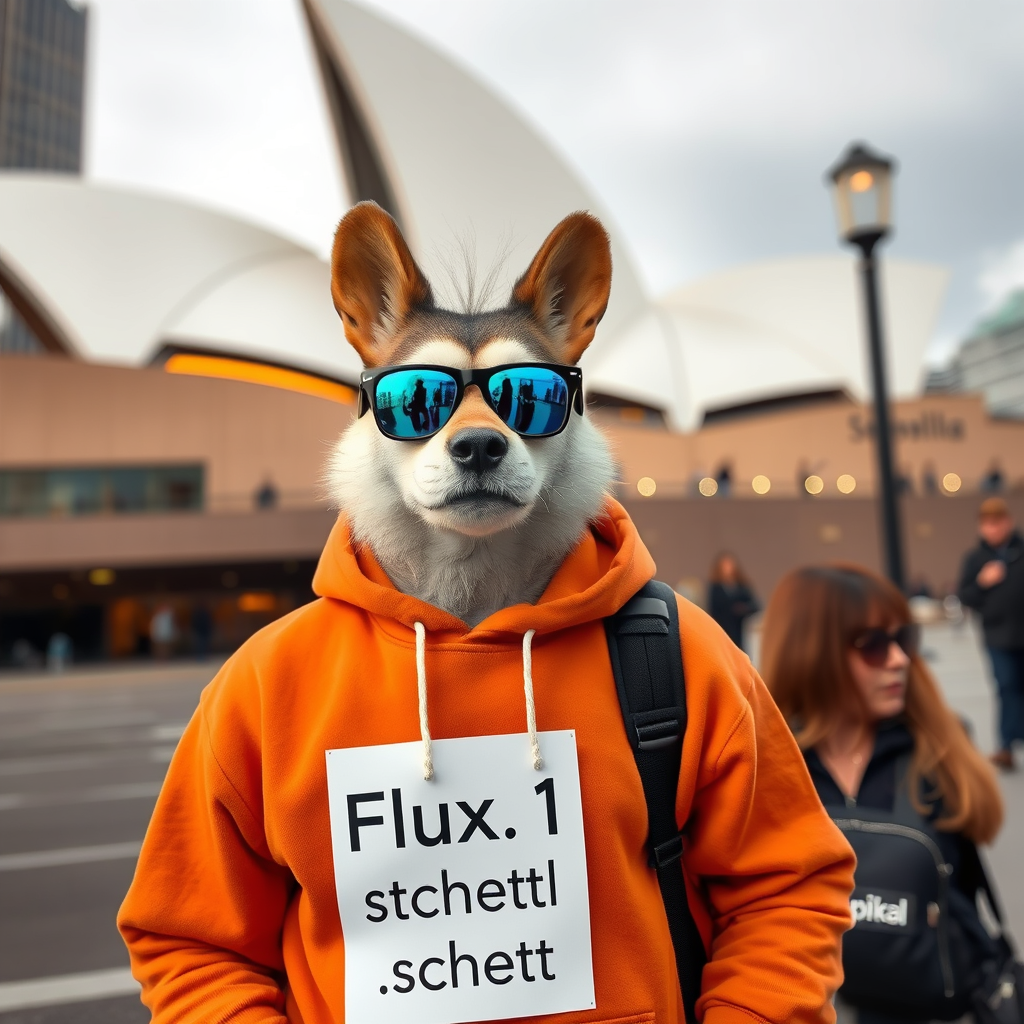

In [2]:
inference("un kangourou avec un sweat à capuche orange et des lunettes de soleil bleues devant l'opéra de Sydney tenant une pancarte 'Flux.1 schnell'")